### Example: Estimate the $\Delta{h}_{vap}$ for R-134a using the Clausius-Clapyeron Equation (CCE)

In [99]:
# some constants -
const R = 8.314*(1/1000) # kJ mol^{-1} K^{-1}
const MW = 102.03 # g/mol

# Load Julia packages -
using DataFrames
using CSV
using PyPlot

# load my code -
include("./code/Normal.jl")

# Load the R134a data -
saturation_data_R134a = CSV.read("R134a-data.csv",delim=',');

In [38]:
saturation_data_R134a

,Temperature (dC),Pressure (kPa),Latent Heat (kJ/kg)
1,-40.0,51.14,225.9
2,-39.0,53.88,225.3
3,-38.0,56.74,224.7
4,-37.0,59.72,224.0
5,-36.0,62.63,223.4
6,-35.0,66.43,222.8
7,-34.0,69.43,222.2
8,-33.0,72.93,221.5
9,-32.0,76.58,220.9
10,-31.0,80.36,220.3


In [100]:
# Solve the normal equations for theta_1 and theta_2 -
theta_vector = solve_normal_equations(saturation_data_R134a)

2×1 Array{Float64,2}:
 -2776.863064475942   
    15.853051533832788

In [101]:
# Convert -
delta_h_vaporization = -R*theta_vector[1]*(1000/MW) # units: kJ/kg

226.27501242823664

In [102]:
# compute the y_model -
(x_model,y_model) = compute_model(theta_vector,saturation_data_R134a);

In [91]:
Y_measured = log.(saturation_data_R134a[:,2]);

#### How does the CCE model do against the data?

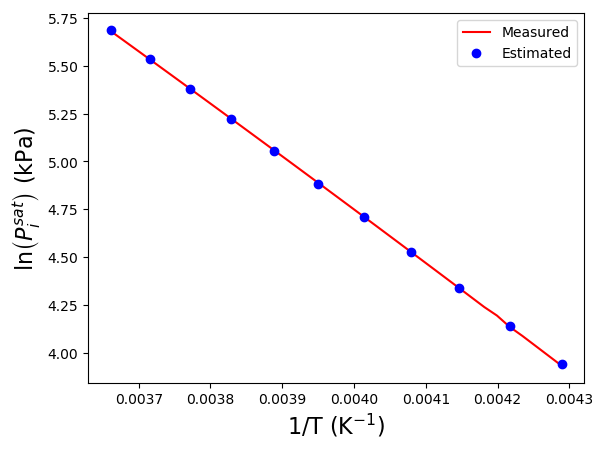

In [125]:
# make a plot -
skip_value = 4;
plot(x_model,Y_measured,"r-",label="Measured");
plot(x_model[1:skip_value:end],y_model[1:skip_value:end],"bo",label="Estimated");
xlabel(L"1/T (K$^{-1}$)",fontsize=16);
ylabel(L"$\ln\left(P_{i}^{sat}\right)$ (kPa)",fontsize=16);

# legend -
legend(loc="upper right");

### How accurate is the $\Delta{h}_{vap}$ estimate?

In [113]:
# compute an error -
error_vector = abs.(((saturation_data_R134a[:,3] .- delta_h_vaporization)./saturation_data_R134a[:,3]))*100;

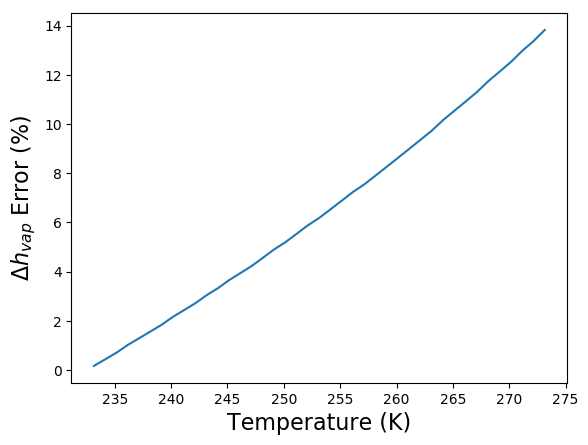

In [130]:
plot((saturation_data_R134a[:,1].+273.15),error_vector);
xlabel("Temperature (K)",fontsize=16);
ylabel(L"$\Delta{h}_{vap}$ Error (%)",fontsize=16);